[0.10594288 0.0199653  0.03910236 ... 0.06784811 0.05034814 0.15041484]


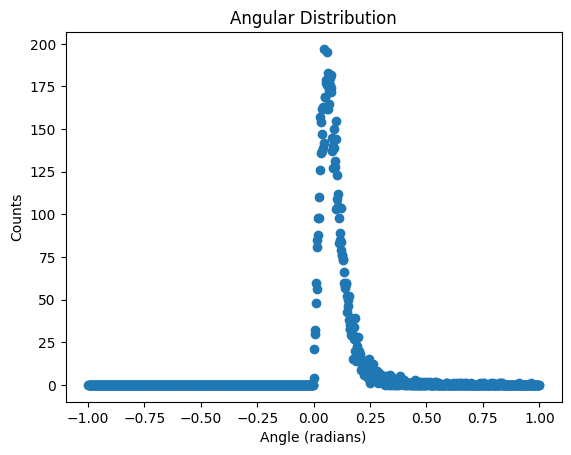

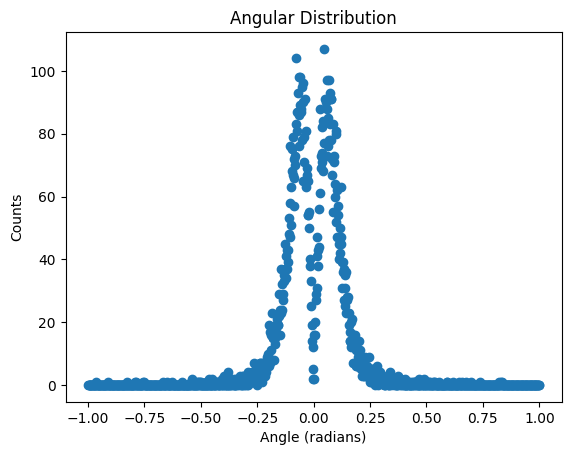

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as m

### ANALYSING SRIM DATA ###


# reads the file for angular data
def generate_data(path, rows=50, cols=(7), spread = False):

    trimdata = open(path)
    
    data_array = np.loadtxt(trimdata, skiprows=12, max_rows=rows, usecols=cols)
    data_array = np.arccos(data_array)

    # Angles will always be positive so we will see a gaussian cut in half
    # To make gaussian symmetric for curve fir we will randomly multiply by -1

    if spread == True:
        for i in range(len(data_array)):
            if np.random.rand() > 0.5:
                data_array[i] = data_array[i] * -1

    trimdata.close()

    return data_array

def plot_angles(data):
    binedges = np.linspace(-1, 1, 1001)
    hist = np.histogram(data, bins=binedges, density=False)[0]
    bincenters = binedges[0:-1] + abs(binedges[1] - binedges[0])/2.0

    plt.scatter(bincenters, hist, clip_on=False, label='Data')
    plt.title('Angular Distribution')
    plt.xlabel('Angle (radians)')
    plt.ylabel('Counts')
    plt.show()
    



data = generate_data('/home/foresttschirhart/Documents/LEGEND/Silicon Detector Project/TRANSMIT.txt', rows = None)
data2 = generate_data('/home/foresttschirhart/Documents/LEGEND/Silicon Detector Project/TRANSMIT.txt', rows = None, spread = True)
print(data)
plot_angles(data)
plot_angles(data2)


